In [71]:
import pandas as pd
import scipy
import shap
import numpy as np
import ZCA as zca
import statsmodels.api as sm
import matplotlib as plt

import IPython

from numpy import mean
from numpy import arange
from numpy import std
from numpy import absolute
from pandas import read_csv
import matplotlib.pyplot
from sklearn.preprocessing import scale
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNetCV
from sklearn.model_selection import train_test_split
import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import numpy as np
import shap
from sklearn.linear_model import ElasticNet
import seaborn as sns
from ModelDiagnostics import Plot
from sklearn.cluster import DBSCAN
from clustergram import Clustergram
import urbangrammar_graphics as ugg
from sklearn.preprocessing import scale
from scipy import stats
from scipy.special import boxcox, inv_boxcox

import urbangrammar_graphics as ugg
from scipy.stats import f

import pandas as pd
import matplotlib.pyplot as plt  
from matplotlib import colors
from sklearn.preprocessing import StandardScaler

import os
os.environ['R_HOME'] = '/mnt/distvol/R/4.0.5/lib64/R/'
import rpy2.robjects as ro
from rpy2.robjects.packages import importr
from rpy2.robjects import pandas2ri
pandas2ri.activate()

from IPython.display import Image


In [72]:
#power = PowerTransformer(method='box-cox')

def testNormal (x):    
    
    k2, p = stats.normaltest(x)
    alpha = .001
    #print("p = {:g}".format(p))    
    if p < alpha:  # null hypothesis: x comes from a normal distribution
        #print(p)
        #print(alpha)
        print("The null hypothesis can be rejected")
        xt, _ = stats.boxcox(x)        
        print(_)
        xt = pd.DataFrame(xt)
        
        return _, pd.DataFrame(xt).set_index(x.index)
    else:
        print("The null hypothesis cannot be rejected")    
        return 1, pd.DataFrame(x)

def inverse_boxcox (data, lambdas):
    return inv_boxcox(data, lambdas.values)
    
def transform_boxcox_l(data, l_):
    transformed = pd.DataFrame()

    for i in range(0,len(data.columns)):
        #print(i)
        if l_.iloc[i].values == 1:
            inner_scale = data.iloc[:,i]            
        else:
            inner_scale = pd.DataFrame(stats.boxcox((data.iloc[:,i]), lmbda=l_.iloc[i].values))
            
        inner_scale.index = data.index
        transformed = pd.concat([transformed,inner_scale],axis=1)
        
    transformed.columns = data.columns
    return transformed

def transform_boxcox (data):
    transformed = pd.DataFrame()
    transformed_lambdas = pd.DataFrame()

    for i in range(0,len(data.columns)):
        l, inner_scale = testNormal(data.iloc[:,i])
        inner_scale.set_index(data.index)

        transformed_lambdas = pd.concat([transformed_lambdas,pd.DataFrame(pd.Series(l))],axis=0)
        transformed = pd.concat([transformed,inner_scale],axis=1)
        
    transformed.columns = data.columns
    return transformed, transformed_lambdas

def revert_boxcox (data, lambdas):
    reverted = pd.DataFrame()

    for i in range(0,len(data.columns)):        
        if lambdas.iloc[i].values == 1 :
            revert = data.iloc[:,i]
        else:
            revert = pd.DataFrame(inv_boxcox(data.iloc[:,i].values, lambdas.iloc[i].values))            
        revert.index = data.index
        reverted = pd.concat([reverted,revert],axis=1)
        
    reverted.columns = data.columns
    return reverted


The null hypothesis cannot be rejected
The null hypothesis cannot be rejected
The null hypothesis can be rejected
3.808144164451117
The null hypothesis cannot be rejected
The null hypothesis can be rejected
-1.001341730447453
The null hypothesis cannot be rejected
The null hypothesis cannot be rejected
The null hypothesis cannot be rejected
The null hypothesis cannot be rejected
The null hypothesis can be rejected
0.027108447248549845



The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.


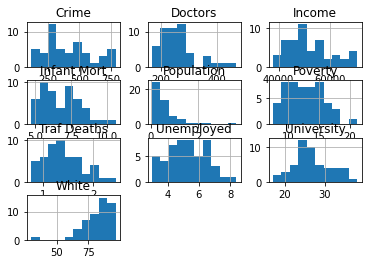

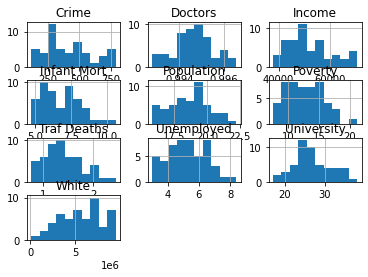

In [73]:
from sklearn.preprocessing import PowerTransformer

all_data = pd.read_csv('/mnt/distvol/states.csv')
all_data.index = all_data.iloc[:,0]

transformed, lambdas = transform_boxcox(all_data.iloc[:,1:])
#scaler = PowerTransformer(method='yeo-johnson').fit(all_data.iloc[:,1:])
#transformed = pd.DataFrame(scaler.transform(all_data.iloc[:,1:]))

transformed.columns = all_data.iloc[:,1:].columns
all_data.iloc[:,1:].hist()
transformed.hist()
transformed.to_csv("/mnt/distvol/transformed.csv")

reverted = revert_boxcox(transformed,lambdas)


In [74]:
d = dtale.show(all_data.iloc[:,1:])
print(d._url)


http://slurmw01:40000


In [75]:
recoded = pd.DataFrame()
for i in all_data.iloc[:,1:].columns:
    t = pd.cut(all_data[i],bins=3,labels=['Low','Mid','High'])
    t.columns = i
    new = t_.groupby(t)[i].mean()
    temp = pd.DataFrame(t).replace('Low',new[0]).replace('Mid',new[1]).replace('High',new[2])
    
    recoded = pd.concat([recoded,temp],axis=1)

print(recoded)

                 Poverty Infant Mort     White     Crime   Doctors  \
States                                                               
Alabama         0.452186    2.052319 -1.302945  0.325796 -0.509742   
Alaska         -0.873252    0.570698 -1.302945  1.670857 -0.509742   
Arizona         0.452186   -0.865193  0.395943  0.325796 -0.509742   
Arkansas        1.764816    0.570698  0.395943  0.325796 -0.509742   
California      0.452186   -0.865193  0.395943  0.325796 -0.509742   
Colorado       -0.873252   -0.865193  0.395943  0.325796 -0.509742   
Connecticut    -0.873252   -0.865193  0.395943 -0.857344  1.793464   
Delaware       -0.873252    0.570698  0.395943  1.670857 -0.509742   
Florida         0.452186    0.570698  0.395943  1.670857 -0.509742   
Georgia         0.452186    0.570698 -1.302945  0.325796 -0.509742   
Hawaii         -0.873252   -0.865193 -2.412339 -0.857344  0.657045   
Idaho           0.452186    0.570698  0.395943 -0.857344 -0.509742   
Illinois        0.45

In [76]:
#d.kill()

Executing shutdown...
Executing shutdown...
Executing shutdown...
Executing shutdown...
Executing shutdown...
Executing shutdown...
Executing shutdown...
Executing shutdown...


2021-05-19 16:44:16,611 - INFO     - Executing shutdown...


In [77]:
from sklearn.metrics import mean_squared_error

def MAPE(Y_actual,Y_Predicted):
    mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
    return mape

In [78]:
import dtale
from scipy.stats import chi
t_ = pd.DataFrame(StandardScaler().fit_transform(transformed))
t_.columns = transformed.columns
t_.index = all_data.index

#t_ = (t_/np.sqrt(scipy.stats.chi2.ppf(.5, len(t_)-1)/len(t_)))
#t_.hist()

d = dtale.show(t_)
print(d._url)


http://slurmw01:40001


In [79]:

#convert to t from s
t_ = pd.DataFrame(StandardScaler().fit_transform(transformed))
t_.columns = transformed.columns
t_.index = all_data.index
#from scipy.stats import chi
#t_ = (t_/np.sqrt(scipy.stats.chi2.ppf(.5, len(t_)-1)/len(t_)))
#t_.hist()

#trf = zca.ZCA().fit(transformed.iloc[:,1:])
trf = zca.ZCA().fit(t_.iloc[:,1:])
#trf = zca.ZCA().fit(recoded.iloc[:,1:])

#X = pd.DataFrame(trf.transform(transformed.iloc[:,1:]))
#X.columns=pd.DataFrame(transformed.iloc[:,1:]).columns

X = pd.DataFrame(trf.transform(t_.iloc[:,1:])).copy()
#X = pd.DataFrame(trf.transform(recoded.iloc[:,1:])).copy()
X.columns=pd.DataFrame(t_.iloc[:,1:]).columns
X.index = all_data.index

#y = pd.DataFrame((transformed.iloc[:,0]-np.mean(transformed.iloc[:,0]))/np.std(transformed.iloc[:,0]))
#y = transformed.iloc[:,0]
y = pd.DataFrame(t_.iloc[:,0])
#y = pd.DataFrame(recoded.iloc[:,0])
y.columns=pd.DataFrame(transformed.iloc[:,0]).columns
y.index = all_data.index

#backwards step
max_pvalue = 1
New_Names = X.columns
X_b = X.copy()

while (max_pvalue > .05):
        
    model = sm.OLS(y,sm.tools.tools.add_constant(X_b, prepend=True, has_constant='skip'))
    results = model.fit()

    set_ = X_b.columns.tolist()
    
    max_pvalue = max(results.pvalues[1:])
    if (max_pvalue > .05):
        print(max_pvalue)
        max_pname = (results.pvalues[1:]).idxmax(axis=1)
        set_.remove(max_pname)
        New_Names = set_
    
        #trf = zca.ZCA().fit(transformed[New_Names])
        #X_b = pd.DataFrame(trf.transform(transformed[New_Names]))
        #X_b.columns=pd.DataFrame(transformed[New_Names]).columns
        #X_b.index = transformed.index
        
        trf = zca.ZCA().fit(t_[New_Names])
        X_b = pd.DataFrame(trf.transform(t_[New_Names]))
        X_b.columns=pd.DataFrame(t_[New_Names]).columns
        X_b.index = t_.index        

print(results.summary())

data = pd.concat([y,X_b],axis=1)
print(data.columns)
data.index = all_data.index
Path="/mnt/distvol"
filename="data"
data.to_csv("/mnt/distvol/data.csv",index=False)


0.3124863193079188
                            OLS Regression Results                            
Dep. Variable:                Poverty   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                     38.39
Date:                Wed, 19 May 2021   Prob (F-statistic):           1.20e-16
Time:                        16:44:16   Log-Likelihood:                -17.470
No. Observations:                  50   AIC:                             52.94
Df Residuals:                      41   BIC:                             70.15
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        8.396e-16      0.0

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


Summary of Regression
:                            OLS Regression Results                            
Dep. Variable:                Poverty   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                     38.39
Date:                Wed, 19 May 2021   Prob (F-statistic):           1.20e-16
Time:                        16:44:16   Log-Likelihood:                -17.470
No. Observations:                  50   AIC:                             52.94
Df Residuals:                      41   BIC:                             70.15
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        8.396e-16     

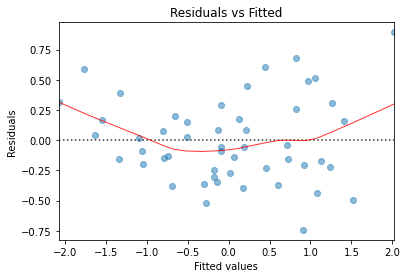

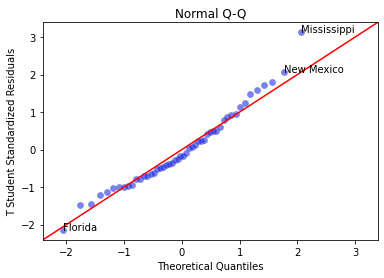

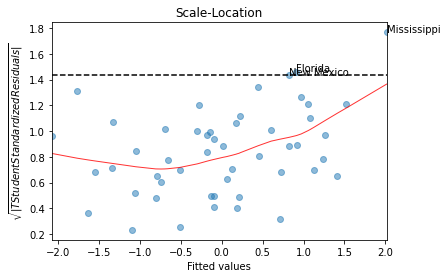

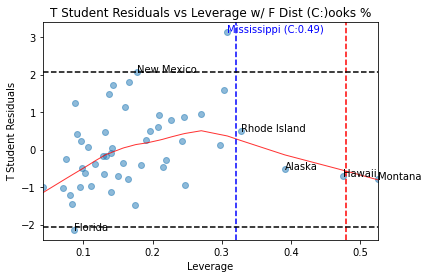

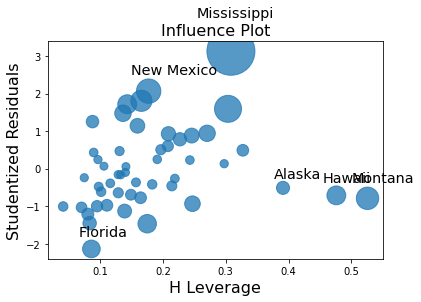

No Studentized residuals with Bonferroni p < 0.05
Largest |rstudent|:
            rstudent unadjusted p-value Bonferroni p
Mississippi 3.125978          0.0032956      0.16478
[0.]


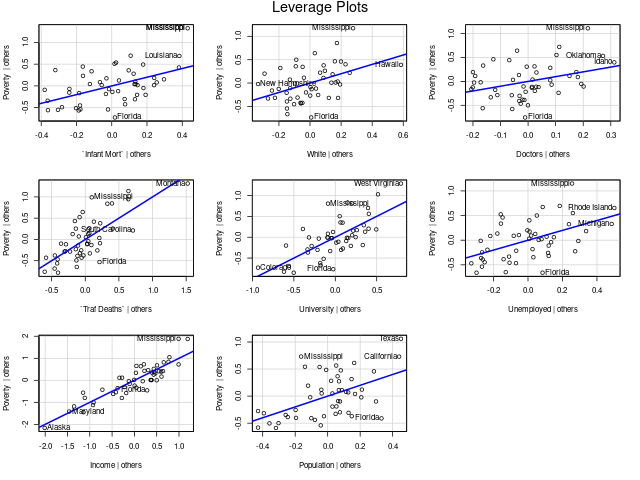

In [80]:
linear_plot = Plot.LinearRegressionResidualPlot(X_b, y)
#linear_plot = LinearRegressionResidualPlot(X_b, y)
lm = linear_plot.fit()
summary, diag_res = linear_plot.diagnostic_plots(lm)
print("Summary of Regression\n:{}".format(summary))
print("Diagnostic Tests of Regression\n:{}".format(diag_res))

sm.graphics.influence_plot(results)
plt.show()

import os
os.environ['R_HOME'] = '/mnt/distvol/R/4.0.5/lib64/R/'
import rpy2.robjects as ro
from rpy2.robjects.packages import importr
from rpy2.robjects import pandas2ri
pandas2ri.activate()

grdevices = importr('grDevices')

grdevices.png(file="/mnt/distvol/leverage.jpg", width=640, height=480)
ro.r('''
eq <- function(data) {
library(carData,lib.loc = "/mnt/distvol/R-4.0.5/library")
library(car,lib.loc = "/mnt/distvol/R-4.0.5/library")

fit <- lm(data)
print(outlierTest(fit))
leveragePlots(fit)

}
''')
r_eq = ro.globalenv['eq']
p=ro.conversion.rpy2py(r_eq(ro.conversion.py2rpy(data)))
#p = ro.r('eq(1)')            # OUTPUTS TO FILE
print(p)
grdevices.dev_off()
from IPython.display import Image
Image("/mnt/distvol/leverage.jpg")




Dataset has 0 variance; skipping density estimate.
Dataset has 0 variance; skipping density estimate.
Dataset has 0 variance; skipping density estimate.
Dataset has 0 variance; skipping density estimate.
Dataset has 0 variance; skipping density estimate.
Dataset has 0 variance; skipping density estimate.
Dataset has 0 variance; skipping density estimate.
Dataset has 0 variance; skipping density estimate.

The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.


array([[<AxesSubplot:title={'center':'Doctors'}>,
        <AxesSubplot:title={'center':'Income'}>,
        <AxesSubplot:title={'center':'Infant Mort'}>],
       [<AxesSubplot:title={'center':'Population'}>,
        <AxesSubplot:title={'center':'Poverty'}>,
        <AxesSubplot:title={'center':'Traf Deaths'}>],
       [<AxesSubplot:title={'center':'Unemployed'}>,
        <AxesSubplot:title={'center':'University'}>,
        <AxesSubplot:title={'center':'White'}>]], dtype=object)

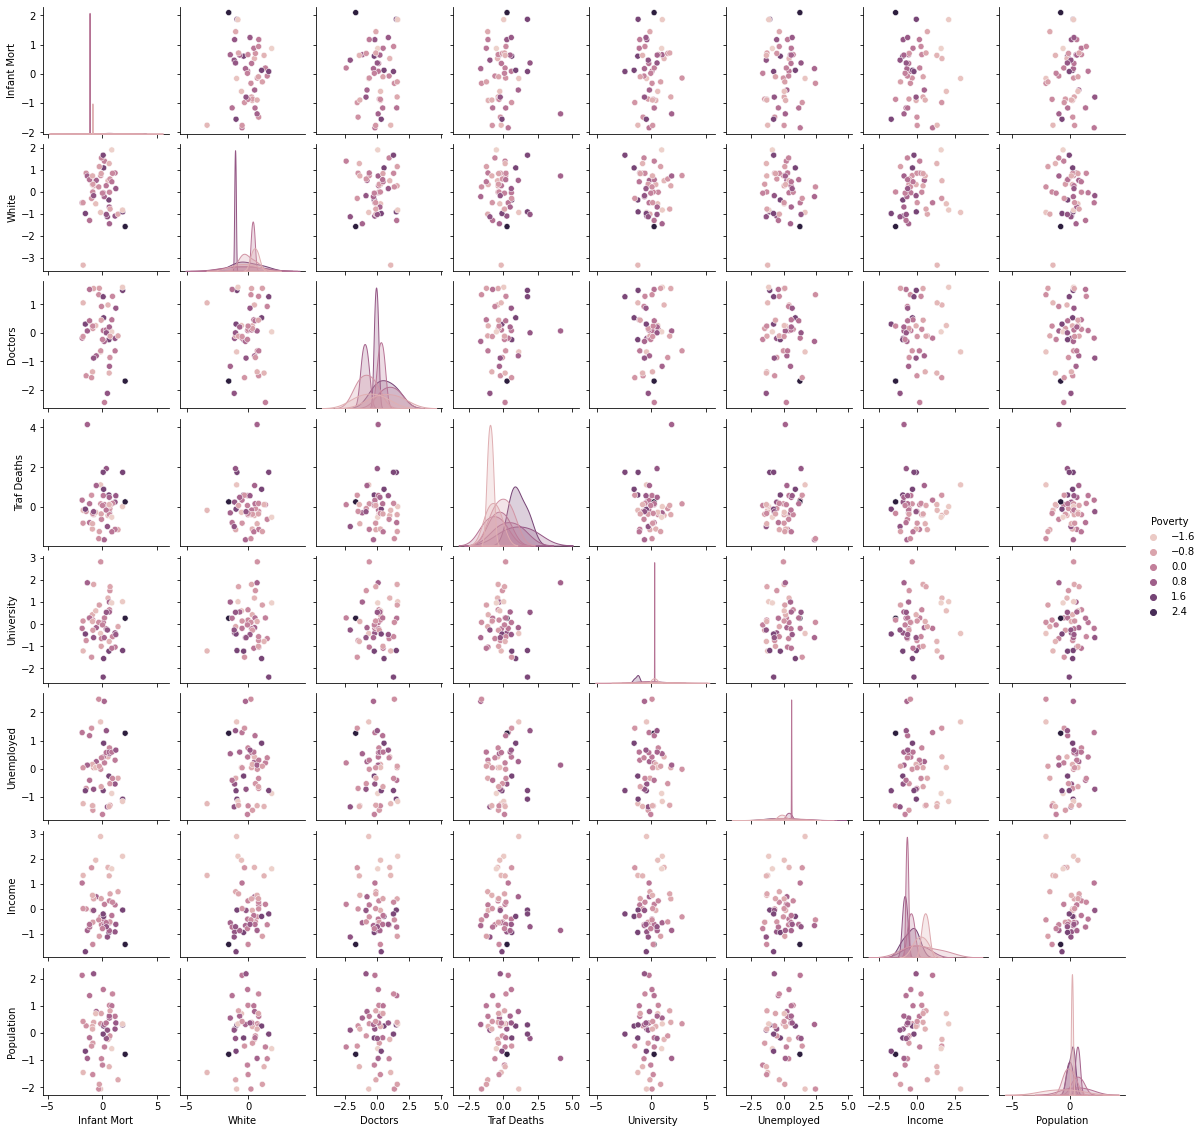

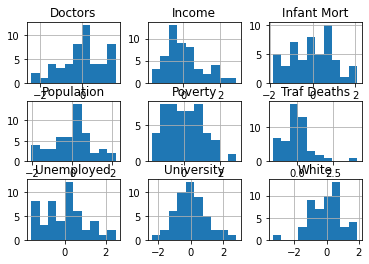

In [81]:
%matplotlib inline

sns.pairplot(pd.concat([y,X_b],axis=1), hue='Poverty', height=2);

pd.concat([y,X_b],axis=1).hist()

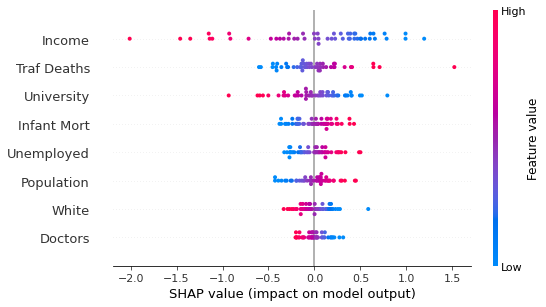

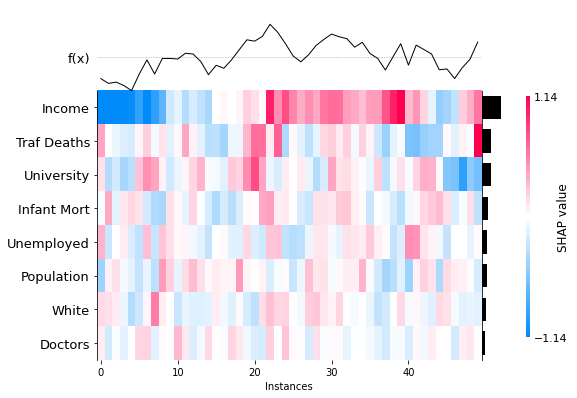

In [82]:

model = sklearn.linear_model.LinearRegression()
model.fit(X_b, y)

shap.initjs()
e = shap.explainers.Linear(model, X_b)

shap_values = e.shap_values(X_b)
shap.summary_plot(shap_values, X_b)
shap.plots.heatmap(e(X_b))

In [83]:
from sklearn.decomposition import PCA
from statsmodels.distributions.empirical_distribution import ECDF

pca = PCA(n_components=0.99, svd_solver='full')
pca.fit(scale(t_))
#pca.explained_variance_
print(pca.explained_variance_ratio_.cumsum())

X_pca = pd.DataFrame(pca.transform(scale(transformed)))

X_pca.index = all_data.index

scaled_pca_var = (1-(1-pca.explained_variance_ratio_.cumsum()))/sum(1-(1-pca.explained_variance_ratio_.cumsum()))

pca_scaled = pd.DataFrame()
for i in range(0,len(X_pca.columns)):
    #inner_scale = pd.DataFrame(X_pca.iloc[:,i].*scaled_pca_var[i])
    inner_scale = X_pca.iloc[:,i] * pca.explained_variance_ratio_[i]
    #plt.plot(pd.DataFrame(st.norm.ppf(ecdf[i].y)).mul(pca.explained_variance_ratio_[i],axis=0))
    #plt.show()
    pca_scaled = pd.concat([pca_scaled,inner_scale],axis=1)
    
pca_scaled.index = all_data.index


[0.43006205 0.67448932 0.77861908 0.8378841  0.89333174 0.93299362
 0.9642088  0.98085949 0.99530264]


2021-05-19 16:44:40,857 - WARNING  - R[write to console]: Loading required package: ggplot2

2021-05-19 16:44:41,463 - WARNING  - R[write to console]: Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa



[1] "Minnesota"
[1] 0.002583824
[1] "Colorado"
[1] 0.009032515
[1] "Washington"
[1] 0.01771935
[1] "Connecticut"
[1] 0.006435666
[1] "Massachusetts"
[1] 0.00696968
[1] "New Jersey"
[1] 0.0190019
[1] "Virginia"
[1] 0.009214945
[1] "Hawaii"
[1] 0.1009399
[1] "Maryland"
[1] 0.05662809
[1] "New York"
[1] 0.09681777
[1] "California"
[1] 0.0313794
[1] "Illinois"
[1] 0.1295247
[1] "Pennsylvania"
[1] 0.2319989
[1] "Michigan"
[1] 0.03562603
[1] "Ohio"
[1] 0.09055581
[1] "North Carolina"
[1] 0.007295679
[1] "Tennessee"
[1] 0.002883399
[1] "South Carolina"
[1] 0.01563685
[1] "Louisiana"
[1] 0.02143581
[1] "Alabama"
[1] 0.006031162
[1] "Mississippi"
[1] 0.02109671
[1] "Arkansas"
[1] 0.01233633
[1] "Oklahoma"
[1] 0.01626086
[1] "New Mexico"
[1] 0.03109894
[1] "Arizona"
[1] 0.03176813
[1] "Indiana"
[1] 0.009070839
[1] "Kentucky"
[1] 0.06791258
[1] "West Virginia"
[1] 0.03950839
[1] "Montana"
[1] 0.03913906
[1] "Idaho"
[1] 0.1223339
[1] "South Dakota"
[1] 0.04247455
[1] "Wyoming"
[1] 0.04874336
[1] "

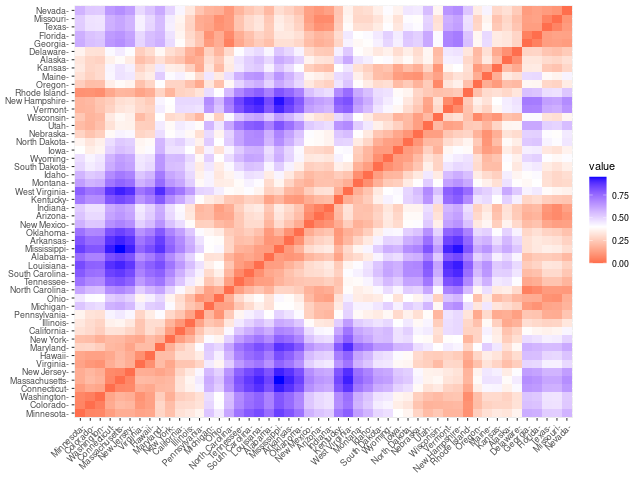

In [84]:

import os
os.environ['R_HOME'] = '/mnt/distvol/R/4.0.5/lib64/R/'
import rpy2.robjects as ro
from rpy2.robjects.packages import importr
from rpy2.robjects import pandas2ri
pandas2ri.activate()

grdevices = importr('grDevices')

grdevices.png(file="/mnt/distvol/rplot.jpg", width=640, height=480)
ro.r('''
eq <- function(values) {
library(cluster)
#library(rgl,lib.loc = "/mnt/distvol/R-4.0.5/library")
#library(pca3d,lib.loc = "/mnt/distvol/R-4.0.5/library")
library(backports,lib.loc = "/mnt/distvol/R-4.0.5/library")
#library(dplyr,lib.loc = "/mnt/distvol/R-4.0.5/library")
library("factoextra",lib.loc = "/mnt/distvol/R-4.0.5/library")
#library("dbscan",lib.loc = "/mnt/distvol/R-4.0.5/library")
#library("mclust",lib.loc = "/mnt/distvol/R-4.0.5/library")
#library("ggpubr",lib.loc = "/mnt/distvol/R-4.0.5/library")
#library("FactoMineR",lib.loc = "/mnt/distvol/R-4.0.5/library")
library("reshape2",lib.loc = "/mnt/distvol/R-4.0.5/library")
#library("data.table",lib.loc = "/mnt/distvol/R-4.0.5/library")
library("NbClust",lib.loc = "/mnt/distvol/R-4.0.5/library")

#data <- read.csv("/mnt/distvol/pca_dist_scaled.csv", row.names=1)
#data2 <- read.csv("/mnt/distvol/states.csv", row.names=1)

data <- values

returnNorm <- function(df)
{
  #print(rownames(df))
  d <- lapply(data[,1:ncol(df)], function(x)
  {
    pnorm(x, mean=0, sd=1, lower.tail=TRUE, log.p =FALSE)
  })
  
  d_ <- data.frame(do.call(cbind, d))
  
  rownames(d_) <- rownames(df)
  #print(rownames(d_))
  return(d_)
   
}

df <- returnNorm(data)
#df2 <- returnNorm(data2[,1:10])

m = (get_dist(df, method = "pearson"))

m = (as.matrix(m))
nm = m

names = rownames(df)
new_names = names

mi = (min(nm[nm>0]))

s = which(( nm == mi), arr.ind=T )

removed = c()

states <- c()

first = new_names[s[1]]

while(length(removed)<49)
{
  states <- c(states, first)
  removed = c(removed,first)
  print(first)

  nm = m[which(names %in% new_names),which(names %in% new_names)]
  second_column = nm[,which(new_names==first)]
  
  column_min = min(second_column[second_column>0])
  print(column_min)
    
  column_min_id = data.frame(which(second_column == column_min))[,1]
  
  column_min_name = new_names[column_min_id]
  
  new_names = names[-which(names %in% removed)]
  
  first = column_min_name
  
}

states <- c(states,rownames(df)[-which(names %in% states)])

keyDF <- data.frame(key=states,weight=1:length(states))

df['States'] = names
#print(df)
merged <- merge(df,keyDF,by.x='States',by.y='key',all.x=T,all.y=F)
res <- merged[order(merged$weight),2:(ncol(df))]
#print(res)
rownames(res) <- states

dist.eucl <- dist(res, method = "euclidean")

#par(mfrow=c(1,2))

#jpeg(file = "myplot%d.jpeg")

#print(df[,1:ncol(df)-1])
nc <- NbClust(data=df[,1:ncol(df)-1], diss = NULL, distance = "euclidean",
        min.nc = 2, max.nc = 15, method = "kmeans")
value = length(unique(nc$Best.partition))
plot(fviz_dist(dist.eucl,show_labels = TRUE, order = FALSE))
#dev.off()

#plot(fviz_dist(dist.eucl,show_labels = TRUE, order = TRUE))
return(list(states,value))

}
''')
r_eq = ro.globalenv['eq']
p=ro.conversion.rpy2py(r_eq(ro.conversion.py2rpy(pca_scaled)))
#p = ro.r('eq(1)')            # OUTPUTS TO FILE
print(p)
grdevices.dev_off()
from IPython.display import Image
Image("/mnt/distvol/rplot.jpg")




K=1 fitted in 4.286349058151245 seconds.
K=2 fitted in 1.6336498260498047 seconds.
K=3 fitted in 1.7673966884613037 seconds.
K=4 fitted in 2.0817947387695312 seconds.
K=5 fitted in 2.213057041168213 seconds.
K=6 fitted in 2.4930927753448486 seconds.
K=7 fitted in 2.7330482006073 seconds.
K=8 fitted in 2.915278434753418 seconds.


Text(0.5, 1.0, 'K-Means (scikit-learn)')

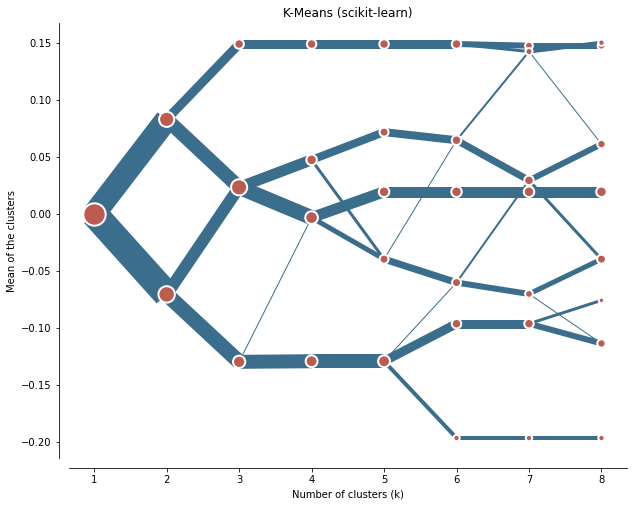

In [85]:
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import scale
from sklearn.preprocessing import QuantileTransformer

cgram = Clustergram(range(1, 9), n_init=1000)
cgram.fit(pca_scaled)

ax = cgram.plot(
    figsize=(10, 8),
    line_style=dict(color=ugg.COLORS[1]),
    cluster_style={"color": ugg.COLORS[2]},
    pca_weighted=False
)
ax.yaxis.grid(False)
sns.despine(offset=10)
ax.set_title('K-Means (scikit-learn)')


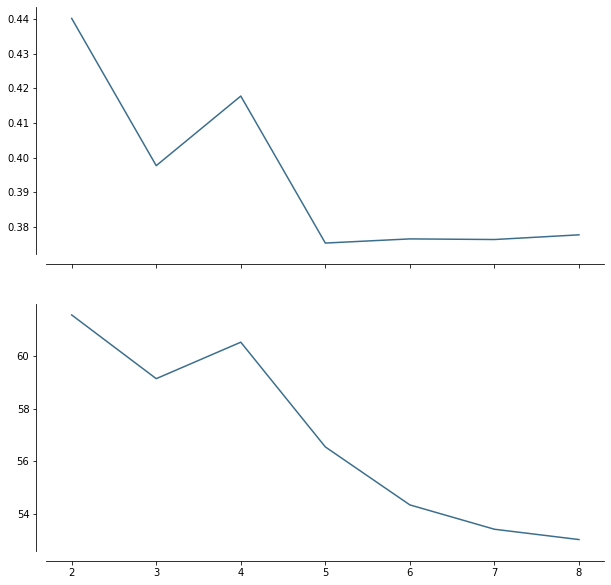

In [86]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(2, figsize=(10, 10), sharex=True)
cgram.silhouette_score().plot(
    #xlabel="Number of clusters (k)",
    #ylabel="Silhouette score",
    color=ugg.COLORS[1],
    ax=axs[0],
)
cgram.calinski_harabasz_score().plot(
    #xlabel="Number of clusters (k)",
    #ylabel="Calinski-Harabasz score",
    color=ugg.COLORS[1],
    ax=axs[1],
)
sns.despine(offset=10)

cluster_pca = cgram.labels.iloc[:,(cgram.calinski_harabasz_score()).idxmax(axis=1)-1]



          Poverty  Infant Mort      White       Crime     Doctors  \
labels                                                              
0       15.152174     7.669565  80.608696  483.217391  224.200000   
1       10.670370     6.114815  83.114815  342.962963  291.007407   

        Traf Deaths  University  Unemployed        Income  count  
labels                                                            
0          1.683478   23.278261    5.595652  45579.304348     23  
1          1.166667   30.059259    4.992593  57441.888889     27  
Index(['Alabama', 'Arizona', 'Arkansas', 'Florida', 'Georgia', 'Idaho',
       'Indiana', 'Kentucky', 'Louisiana', 'Michigan', 'Mississippi',
       'Missouri', 'Montana', 'Nevada', 'New Mexico', 'North Carolina', 'Ohio',
       'Oklahoma', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas',
       'West Virginia'],
      dtype='object', name='States')


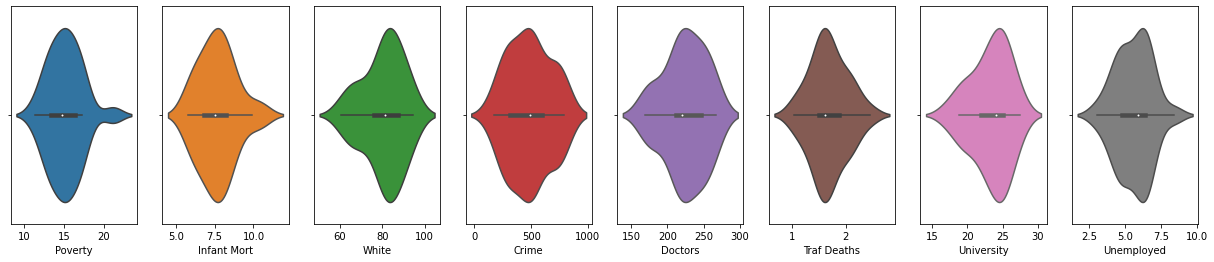

Index(['Alaska', 'California', 'Colorado', 'Connecticut', 'Delaware', 'Hawaii',
       'Illinois', 'Iowa', 'Kansas', 'Maine', 'Maryland', 'Massachusetts',
       'Minnesota', 'Nebraska', 'New Hampshire', 'New Jersey', 'New York',
       'North Dakota', 'Oregon', 'Pennsylvania', 'Rhode Island', 'Utah',
       'Vermont', 'Virginia', 'Washington', 'Wisconsin', 'Wyoming'],
      dtype='object', name='States')


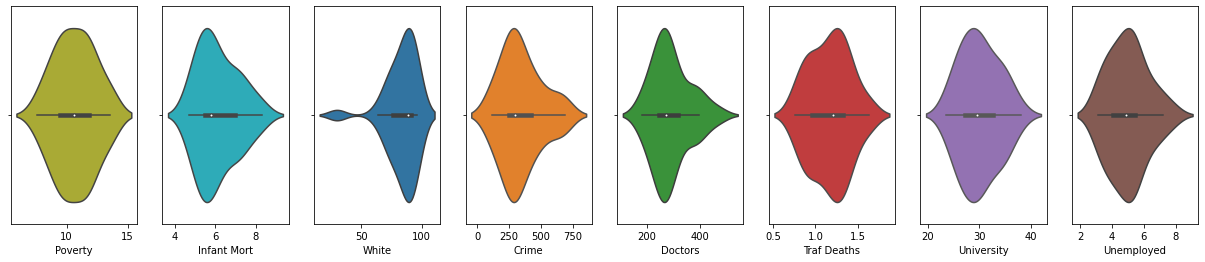

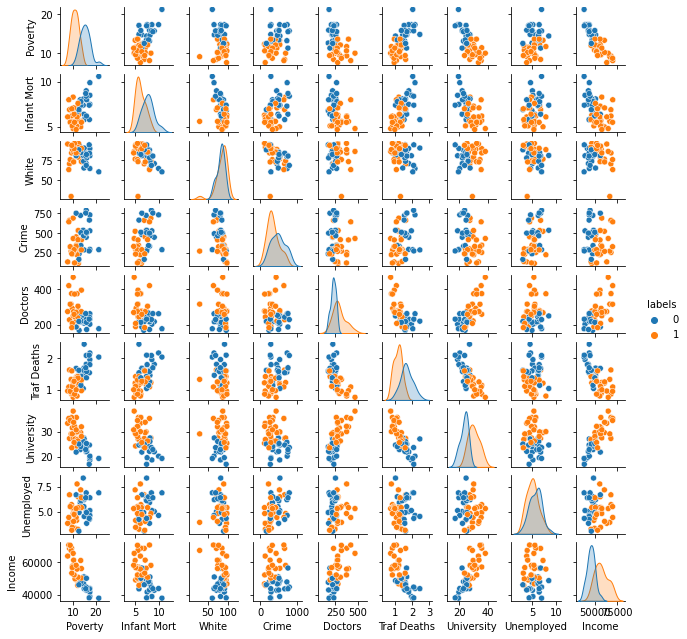

In [87]:
from itertools import cycle
import matplotlib.pyplot as plt

all_data2 = all_data.iloc[:,1:10]

cluster_pca.index = all_data2.index

pca_scaled['labels'] = pd.DataFrame(cluster_pca)
transformed['labels'] = pd.DataFrame(cluster_pca)
transformed.to_csv("transformed.csv")
pca_scaled.to_csv("pca_dist_scaled.csv")
all_data2['labels'] = pd.DataFrame(cluster_pca)

summary_set2 = all_data2[all_data2['labels']>=-1][all_data2.columns].groupby('labels').mean()
summary_set2["count"] = pd.DataFrame(all_data2[all_data2['labels']>=-1][all_data2.columns].groupby('labels').count())[all_data2.columns[0]]
print(summary_set2)

%matplotlib inline 

prop_cycle = plt.rcParams['axes.prop_cycle']
colors = cycle(prop_cycle.by_key()['color'])

for i in range(0,(cgram.calinski_harabasz_score()).idxmax(axis=1)):
        fig = plt.figure(figsize=(24,4))  
        group = all_data2.loc[all_data2.index[cluster_pca==i]]
        #groupmean = group.iloc[:,0].mean()        
        print(group.index)
        for j in range(0,len(all_data2.columns)-2):                
            plt.subplot(1,len(all_data2.columns)-1,j+1)
            #plt.subplot(1,2,2)
            
            sns.violinplot(x=group[group.columns[j]],color=next(colors))
            #sns.violinplot(ax=axes[j,0], x=group[group.columns[j]])     
            #print(i,j)

        plt.show()
        
sns.pairplot(all_data2, hue='labels', height=1);
    

        

The null hypothesis cannot be rejected
The null hypothesis cannot be rejected
The null hypothesis can be rejected
3.460385138828063
The null hypothesis cannot be rejected
The null hypothesis cannot be rejected
The null hypothesis cannot be rejected
The null hypothesis cannot be rejected
The null hypothesis cannot be rejected
The null hypothesis cannot be rejected
The null hypothesis can be rejected
0.015219449659467928
alpha: 0.100000
l1_ratio_: 0.130000
                                0
Income                   0.487471
Traf Deaths              0.237552
Crime Unemployed         0.194400
Population               0.159755
University               0.104077
Infant Mort Unemployed   0.102106
Income Population        0.101699
Crime                    0.083757
Infant Mort Crime        0.073473
Traf Deaths Population   0.061839
Traf Deaths University   0.055598
Crime Income             0.051735
Crime Doctors            0.051198
White                    0.048718
Infant Mort Traf Deaths  0.0483

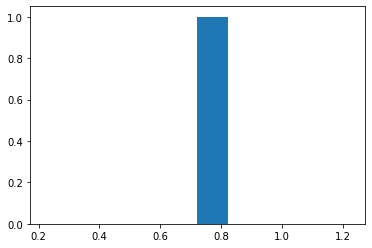

In [88]:
import sys
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

import sklearn
from sklearn.preprocessing import *
from sklearn import preprocessing
import matplotlib.pyplot as plt

scores = np.zeros((10,2,1))

#truth = [False,True]
#for t in truth:
#    for p in range(0,2):
#        for i in range(0,10):
#            scores[i,p,t] = [i*p*t]
#scores

#True disables

c_box_d = [True]
polys = [2]
i_only_choice = [True]
numRuns = 1

for p in polys:
    
    for ic in i_only_choice:
        
        for cbd in c_box_d:

            scores = []
            for r in range(0,numRuns):            

                # evaluate an elastic net model on the dataset
                tsize = .20
                train, test = train_test_split(all_data.iloc[:,1:], test_size=tsize, shuffle=True)

                #interaction = PolynomialFeatures(degree=p, include_bias=False, interaction_only=False)
                interaction = PolynomialFeatures(degree=p, include_bias=False, interaction_only=ic)

                train_t, lambdas_t = transform_boxcox(train)

                #disabled boxcox
                if cbd:
                    train_t = train

                scaler = preprocessing.StandardScaler().fit(train_t)

                #
                train_s = pd.DataFrame(scaler.transform(train_t))
                train_s.columns = train.columns
                train_s.index = train.index  

                train_t = train_s

                test_t = transform_boxcox_l(test, lambdas_t)

                #disabled boxcox
                if cbd:
                    test_t = test

                test_s = pd.DataFrame(scaler.transform(test_t))
                test_s.columns = test.columns
                test_s.index = test.index

                test_t = test_s

                y_train = pd.DataFrame(train_t.iloc[:,0])

                #exclude y

                X_train = train_t.iloc[:,1:]

                X_inter_train = pd.DataFrame(interaction.fit_transform(X_train), columns=interaction.get_feature_names(input_features=pd.DataFrame(train_t.iloc[:,1:]).columns))

                    #apply ZCA each time a set of factors are removed (i.e. iteratively)
                 #trf = zca.ZCA().fit(X_inter_train)
                  #trf = zca.ZCA().fit(X_train)

                 #X_train = pd.DataFrame(trf.transform(X_inter_train))
                  #X_train = pd.DataFrame(trf.transform(X_train))
                 #X_train.columns=X_inter_train.columns
                  #X_train.columns=X_train.columns
                  #X_train.index = train.index

                #X_inter_alt = X_train.iloc[:, np.array(range(0,len(all_data.iloc[:,2:].columns)))]
                #print(X_inter_alt.head(3))

                y_test = pd.DataFrame(test_t.iloc[:,0])

                X_test = test_t.iloc[:,1:]

                X_inter_test = pd.DataFrame(interaction.fit_transform(X_test), columns=interaction.get_feature_names(input_features=pd.DataFrame(test_t.iloc[:,1:]).columns))

                 #X_test = pd.DataFrame(trf.transform(X_inter_test))
                  #X_test = pd.DataFrame(trf.transform(X_test))

                 #X_test.columns=X_inter_test.columns
                  #X_test.columns=X_test.columns
                  #X_test.index = test.index

                #X_inter_t_alt = X_test.iloc[:, np.array(range(0,len(all_data.iloc[:,2:].columns)))]
                #X_inter_t_alt.head()


                '''
                model = ElasticNet()
                # define model evaluation method
                cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
                # define grid
                grid = dict()
                grid['alpha'] = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0.0, 1.0, 10.0, 100.0]
                grid['l1_ratio'] = arange(0, 1, 0.01)
                # define search
                search = GridSearchCV(model, grid, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
                # perform the search
                results = search.fit(X_train, y_train)
                # summarize
                print('MAE: %.3f' % results.best_score_)
                print('Config: %s' % results.best_params_)
                '''

                # define model evaluation method
                cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
                # define model
                ratios = arange(0, 1, 0.01)
                alphas = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0.0, 1.0, 10.0, 100.0]
                model = ElasticNetCV(l1_ratio=ratios, alphas=alphas, cv=cv, n_jobs=-1, verbose=0)
                # fit model

                 #model.fit(X_train, y_train)
                model.fit(X_inter_train, y_train)
                # summarize chosen configuration
                print('alpha: %f' % model.alpha_)
                print('l1_ratio_: %f' % model.l1_ratio_)

                #prediction
                yhat = model.predict(X_inter_test)

                 #coef = pd.DataFrame(model.coef_).set_index(X_train.columns)
                coef = pd.DataFrame(model.coef_).set_index(X_inter_train.columns)

                a_coef = abs(coef)
                a_coef.sort_values(by=[0],ascending=False,inplace=True)
                #a_coef
                print(a_coef[a_coef>0].dropna())

                 #print(model.score(X_train, y_train, sample_weight=None))
                 #print(model.score(X_test, y_test, sample_weight=None))
                trainScore = model.score(X_inter_train, y_train, sample_weight=None)
                testScore = model.score(X_inter_test, y_test, sample_weight=None)
                print(trainScore)
                print(testScore)
                scores.append(testScore)

                #print(model.score(X, y, sample_weight=None))
                #print(model.coef_)

            print("# polynomials/interactions: " +str(p))
            print("cox box transform?: " +str(cbd))
            print("disable polynomials: " + str(ic))
            print("mean score: " + str(mean(scores)))
            print(scores)
            #pd.DataFrame(scores).hist
            plt.hist(pd.DataFrame(scores))
            plt.show()
            
        

In [89]:
#defaults
cbd = True
p = 2
ic = True


true
true


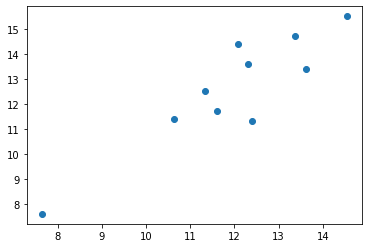

rmse 1.2958083714195152
mape Poverty    6.970936
dtype: float64


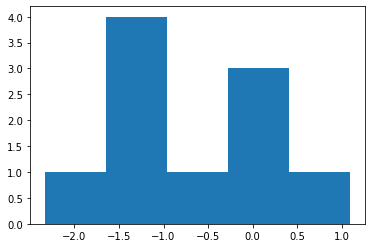

In [90]:
import matplotlib.pyplot as plt
#predicted = pd.DataFrame(yhat*std_+mean_)
predicted = pd.DataFrame(yhat * scaler.scale_[0] + scaler.mean_[0])
if cbd==True:
    if lambdas_t.iloc[0].values==1:
        print("true")
        predicted=predicted
    else:
        predicted = pd.DataFrame(stats.boxcox(predicted.iloc[:,0], lmbda=lambdas_t.iloc[0].values))

predicted.index = y_test.index
predicted.columns = y_test.columns

actual = pd.DataFrame(y_test * scaler.scale_[0] + scaler.mean_[0])
if cbd==True:
    if lambdas_t.iloc[0].values==1:
        print("true")
        actual=actual
    else:
        actual = pd.DataFrame(stats.boxcox(actual.iloc[:,0], lmbda=lambdas_t.iloc[0].values))

actual.index = y_test.index
plt.scatter(predicted, actual)

plt.show()

plt.hist(predicted-actual, bins='auto')  # arguments are passed to np.histogram

rmse = mean_squared_error(actual, predicted, squared=True)
mape = MAPE(actual, predicted)

print("rmse",rmse)
print("mape",mape)

Index(['Poverty'], dtype='object')


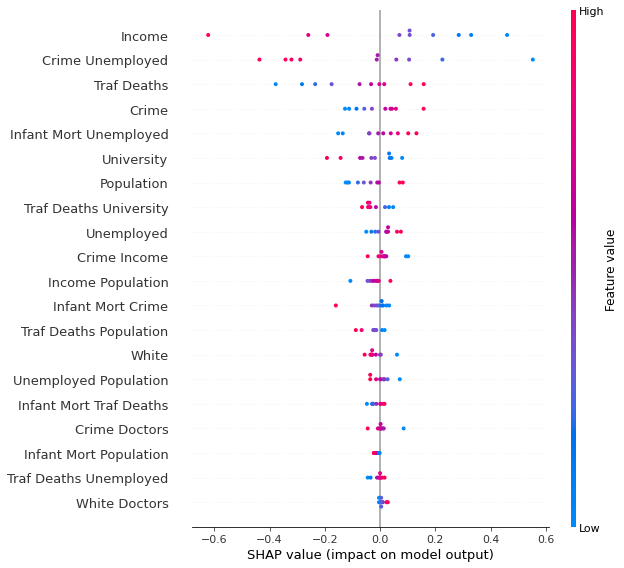

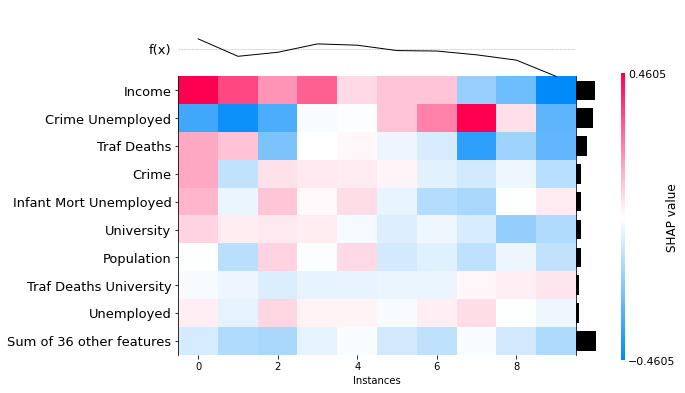

In [91]:
%matplotlib inline
shap.initjs()

# explain predictions of the model on four images
e = shap.LinearExplainer(model, X_inter_train)
#explainer = shap.KernelExplainer(model, X_train, link="logit")
print(y_test.columns)
shap_values = e.shap_values(X_inter_test)
shap.summary_plot(shap_values, X_inter_test)
explainer = shap.Explainer(model, X_inter_train)
shap.plots.heatmap(explainer(X_inter_test))

In [92]:
vals= np.abs(shap_values).mean(0)
feature_importance = pd.DataFrame(list(zip(X_inter_train.columns,vals)),columns=['col_name','feature_importance_vals'])
feature_importance.sort_values(by=['feature_importance_vals'],ascending=False,inplace=True)

#pre_list = feature_importance[feature_importance["feature_importance_vals"]>.01]["col_name"].values.tolist()
pre_list = feature_importance[feature_importance["feature_importance_vals"]>0]["col_name"].values.tolist()
pre_list.insert(0,all_data.columns[1])
pre_list = pre_list[1:]

In [93]:
#Model as defined by SHAP is pre_list
#by Elastic net is elastic_list (same results)
#all data
#prelist is better

elastic_list = a_coef[a_coef>0].dropna().index

train = all_data.iloc[:,1:]

interaction = PolynomialFeatures(degree=p, include_bias=False, interaction_only=ic)

train_t, lambdas_t = transform_boxcox(train)

#disabled boxcox
if cbd:
    train_t = train

#scaler_y = preprocessing.StandardScaler().fit(np.array(train_t.iloc[:,0]).reshape(-1, 1))

scaler = preprocessing.StandardScaler().fit(train_t)

_train = pd.DataFrame(scaler.transform(train_t))

y_train = _train.iloc[:,0]
y_train.index = train_t.index
y_train.columns = train_t.columns[0]
                       
X_train = train_t.iloc[:,1:]

X_inter_train = pd.DataFrame(interaction.fit_transform(X_train), columns=interaction.get_feature_names(input_features=pd.DataFrame(train_t.iloc[:,1:]).columns))
X_inter_train = X_inter_train[elastic_list]
X_inter_train.index = X_train.index

scaler_x_i = zca.ZCA().fit(X_inter_train)

X_inter_train_i = pd.DataFrame(scaler_x_i.transform(X_inter_train))
X_inter_train_i.columns = X_inter_train.columns
X_inter_train_i.index = train.index

vetted_data_set=pd.concat([y_train, X_inter_train[pre_list]],axis=1)
vetted_data_set_i=pd.concat([y_train, X_inter_train_i[pre_list]],axis=1)

model_i = sm.OLS(y_train,sm.tools.tools.add_constant(vetted_data_set_i.iloc[:,1:], prepend=True, has_constant='skip'))        
model_ = sm.OLS(y_train,sm.tools.tools.add_constant(vetted_data_set.iloc[:,1:], prepend=True, has_constant='skip'))        
results = model_.fit()
results_i = model_i.fit()

#model_ = ElasticNet(alpha=)


The null hypothesis cannot be rejected
The null hypothesis cannot be rejected
The null hypothesis can be rejected
3.808144164451117
The null hypothesis cannot be rejected
The null hypothesis can be rejected
-1.001341730447453
The null hypothesis cannot be rejected
The null hypothesis cannot be rejected
The null hypothesis cannot be rejected
The null hypothesis cannot be rejected
The null hypothesis can be rejected
0.027108447248549845


Summary of Regression
:                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     24.68
Date:                Wed, 19 May 2021   Prob (F-statistic):           4.52e-11
Time:                        16:45:32   Log-Likelihood:                 15.139
No. Observations:                  50   AIC:                             25.72
Df Residuals:                      22   BIC:                             79.26
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
con

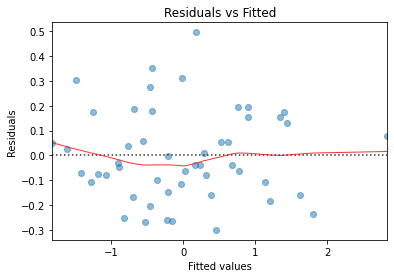

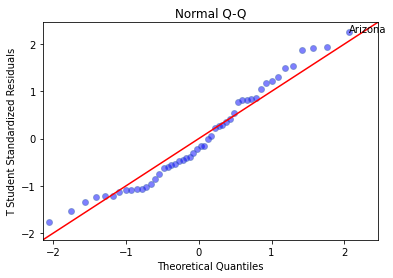

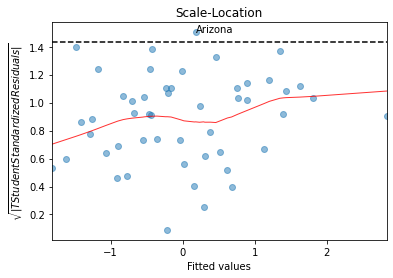

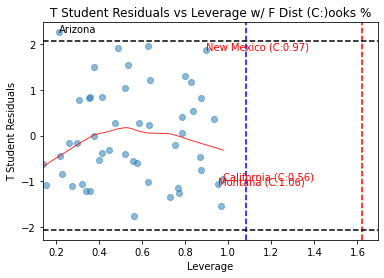

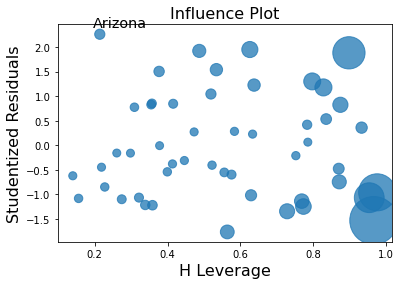

In [94]:
linear_plot = Plot.LinearRegressionResidualPlot(vetted_data_set_i.iloc[:,1:], y_train)
lm = linear_plot.fit()
summary, diag_res = linear_plot.diagnostic_plots(lm)
print("Summary of Regression\n:{}".format(summary))
print("Diagnostic Tests of Regression\n:{}".format(diag_res))

sm.graphics.influence_plot(results_i)
plt.show()

if False:
    grdevices = importr('grDevices')

    grdevices.png(file="/mnt/distvol/leverage2.jpg", width=640, height=480)
    ro.r('''
    eq <- function(data) {
    library(carData,lib.loc = "/mnt/distvol/R-4.0.5/library")
    library(car,lib.loc = "/mnt/distvol/R-4.0.5/library")

    fit <- lm(data)
    print(outlierTest(fit))
    leveragePlots(fit)

    }
    ''')
    r_eq = ro.globalenv['eq']
    p=ro.conversion.rpy2py(r_eq(ro.conversion.py2rpy(pd.concat([y_train,vetted_data_set.iloc[:,1:]],axis=1))))
    #p = ro.r('eq(1)')            # OUTPUTS TO FILE
    #print(p)
    grdevices.dev_off()

    Image("/mnt/distvol/leverage2.jpg")



In [95]:
print(pre_list)
print(len(pre_list))
print(elastic_list)
print(len(elastic_list))

len(set(elastic_list) & set(pre_list))

['Income', 'Crime Unemployed', 'Traf Deaths', 'Crime', 'Infant Mort Unemployed', 'University', 'Population', 'Traf Deaths University', 'Unemployed', 'Crime Income', 'Income Population', 'Infant Mort Crime', 'Traf Deaths Population', 'White', 'Unemployed Population', 'Infant Mort Traf Deaths', 'Crime Doctors', 'Infant Mort Population', 'Traf Deaths Unemployed', 'White Doctors', 'Doctors Income', 'Traf Deaths Income', 'University Income', 'Infant Mort Doctors', 'White Unemployed', 'University Unemployed', 'White Crime']
27
Index(['Income', 'Traf Deaths', 'Crime Unemployed', 'Population', 'University',
       'Infant Mort Unemployed', 'Income Population', 'Crime',
       'Infant Mort Crime', 'Traf Deaths Population', 'Traf Deaths University',
       'Crime Income', 'Crime Doctors', 'White', 'Infant Mort Traf Deaths',
       'Infant Mort Population', 'Unemployed Population', 'Unemployed',
       'White Doctors', 'Infant Mort Doctors', 'Doctors Income',
       'Traf Deaths Income', 'Traf De

27

In [96]:
#Model as defined by elastic net with backwards step applied

train = all_data.iloc[:,1:]

interaction = PolynomialFeatures(degree=p, include_bias=False, interaction_only=ic)

train_t, lambdas_t = transform_boxcox(train)

#disabled boxcox
if cbd:
    train_t = train

scaler_y = preprocessing.StandardScaler().fit(np.array(train_t.iloc[:,0]).reshape(-1, 1))

 #scaler_x = zca.ZCA().fit(train_t.iloc[:,1:])
scaler_x = preprocessing.StandardScaler().fit(train_t.iloc[:,1:])

y_train = pd.DataFrame(scaler_y.transform(np.array(train_t.iloc[:,0]).reshape(-1, 1)))
y_train.index = train.index
y_train.columns = pd.DataFrame(train.iloc[:,0]).columns
                       
X_train = pd.DataFrame(scaler_x.transform(train_t.iloc[:,1:]))

X_inter_train = pd.DataFrame(interaction.fit_transform(X_train), columns=interaction.get_feature_names(input_features=pd.DataFrame(train_t.iloc[:,1:]).columns))
X_inter_train.index = X_train.index
X_inter_train = X_inter_train[pre_list[1:]]

#vetted_data_set=pd.concat([y_train, X_inter_train[pre_list[1:]]],axis=1)

#backwards step

max_pvalue = 1
New_Names = X_inter_train.columns
X_b = X_inter_train
while (max_pvalue > .05):
        
    trf = zca.ZCA().fit(X_b)
        
    X_b_z = pd.DataFrame(trf.transform(X_b))
    X_b_z.columns=pd.DataFrame(X_b).columns
    X_b_z.index = train.index

    model = sm.OLS(y_train,sm.tools.tools.add_constant(X_b_z, prepend=True, has_constant='skip'))        
    results = model.fit()

    set_ = X_b.columns.tolist()
    
    max_pvalue = max(results.pvalues[1:])
    if (max_pvalue > .05):
        print(max_pvalue)
        max_pname = (results.pvalues[1:]).idxmax(axis=1)
        set_.remove(max_pname)
        New_Names = set_
    
        X_b = X_inter_train[New_Names]
        X_b.index = train.index


The null hypothesis cannot be rejected
The null hypothesis cannot be rejected
The null hypothesis can be rejected
3.808144164451117
The null hypothesis cannot be rejected
The null hypothesis can be rejected
-1.001341730447453
The null hypothesis cannot be rejected
The null hypothesis cannot be rejected
The null hypothesis cannot be rejected
The null hypothesis cannot be rejected
The null hypothesis can be rejected
0.027108447248549845
0.822585889190139
0.7542799171841567
0.5145288717177636
0.48929590489955965
0.47913069666039276
0.4220974451927162
0.48004260704878443
0.37327972467283155
0.32299858584010765
0.26432090427778
0.2714712818313716
0.21031724518580067
0.2761342423981009
0.0703894126437975


Summary of Regression
:                            OLS Regression Results                            
Dep. Variable:                Poverty   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     18.91
Date:                Wed, 19 May 2021   Prob (F-statistic):           3.05e-12
Time:                        16:45:33   Log-Likelihood:                -21.831
No. Observations:                  50   AIC:                             69.66
Df Residuals:                      37   BIC:                             94.52
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
con

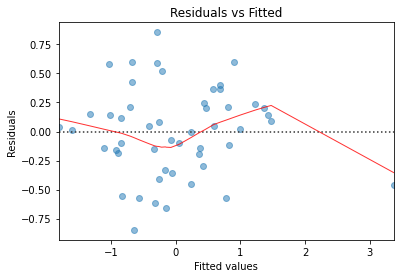

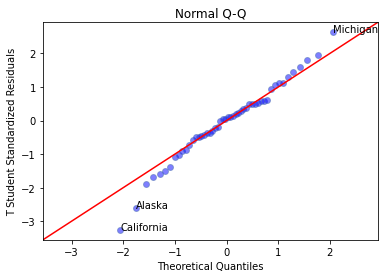

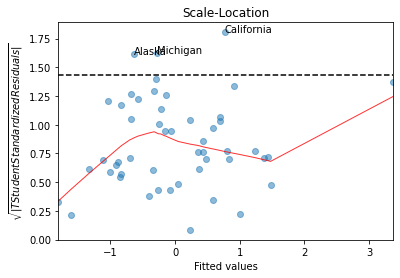

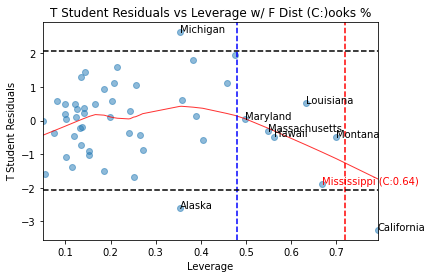

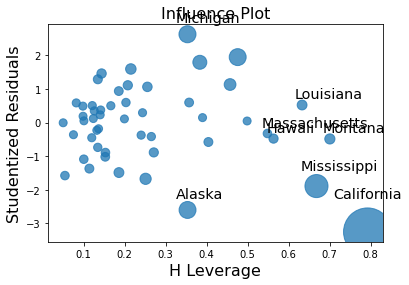

In [97]:

linear_plot = Plot.LinearRegressionResidualPlot(X_b_z, y_train)
lm = linear_plot.fit()
summary, diag_res = linear_plot.diagnostic_plots(lm)
print("Summary of Regression\n:{}".format(summary))
print("Diagnostic Tests of Regression\n:{}".format(diag_res))

sm.graphics.influence_plot(results)
plt.show()

if False:
    grdevices = importr('grDevices')

    grdevices.png(file="/mnt/distvol/leverage3.jpg", width=640, height=480)
    ro.r('''
    eq <- function(data) {
    library(carData,lib.loc = "/mnt/distvol/R-4.0.5/library")
    library(car,lib.loc = "/mnt/distvol/R-4.0.5/library")

    fit <- lm(data)
    print(outlierTest(fit))
    leveragePlots(fit)

    }
    ''')
    r_eq = ro.globalenv['eq']
    p=ro.conversion.rpy2py(r_eq(ro.conversion.py2rpy(pd.concat([y_train,X_b_z],axis=1))))
    #p = ro.r('eq(1)')            # OUTPUTS TO FILE
    print(p)
    grdevices.dev_off()

    Image("/mnt/distvol/leverage3.jpg")




In [98]:
pca = PCA(n_components=0.99, svd_solver='full')
pca.fit(X_b)
#pca.explained_variance_
print(pca.explained_variance_ratio_.cumsum())

X_pca = pd.DataFrame(pca.transform(X_b))

X_pca.index = all_data.index

scaled_pca_var = (1-(1-pca.explained_variance_ratio_.cumsum()))/sum(1-(1-pca.explained_variance_ratio_.cumsum()))
'''
pca_scaled = pd.DataFrame()
for i in range(0,len(X_pca.columns)):
    #inner_scale = pd.DataFrame(X_pca.iloc[:,i].*scaled_pca_var[i])
    inner_scale = X_pca.iloc[:,i] * pca.explained_variance_ratio_[i]
    #plt.plot(pd.DataFrame(st.norm.ppf(ecdf[i].y)).mul(pca.explained_variance_ratio_[i],axis=0))
    #plt.show()
    pca_scaled = pd.concat([pca_scaled,inner_scale],axis=1)
    
pca_scaled.index = all_data.index
'''

[0.22748213 0.40948746 0.57328936 0.67485038 0.76590804 0.83423656
 0.88410934 0.92404466 0.95348022 0.97768655 0.99225964]


'\npca_scaled = pd.DataFrame()\nfor i in range(0,len(X_pca.columns)):\n    #inner_scale = pd.DataFrame(X_pca.iloc[:,i].*scaled_pca_var[i])\n    inner_scale = X_pca.iloc[:,i] * pca.explained_variance_ratio_[i]\n    #plt.plot(pd.DataFrame(st.norm.ppf(ecdf[i].y)).mul(pca.explained_variance_ratio_[i],axis=0))\n    #plt.show()\n    pca_scaled = pd.concat([pca_scaled,inner_scale],axis=1)\n    \npca_scaled.index = all_data.index\n'

In [99]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

%matplotlib widget

sns.set(style = "darkgrid")

pca_set = pd.concat([y_train,X_pca],axis=1)
#from earlier pca analysis
pca_set['labels'] = pca_scaled['labels']

fig = plt.figure(figsize=[16,16])
ax = fig.add_subplot(111, projection = '3d')

x = pca_set.iloc[:,1]
y = pca_set.iloc[:,2]
z = pca_set.iloc[:,3]

m = np.array([x,y,z])
scatter = ax.scatter(x,y,z, c=pca_set.iloc[:,0], cmap="RdYlGn", s=(pca_set['labels']+2)*40, edgecolors="black")

handles, labels = scatter.legend_elements(prop="sizes", alpha=0.6)

#legend2 = ax.legend(*scatter.legend_elements(prop="sizes", alpha=0.6),loc="upper left", title="clusters")

legend2 = ax.legend(handles, range(0,len(labels)), loc="upper right", title="clusters")
#ax.legend()
ax.add_artist(legend2)
    
states = ["AL","AK","AZ","AR","CA","CO","CT","DE","FL","GA","HI","ID","IL","IN","IA","KS","KY","LA","ME","MD","MA","MI","MN","MS","MO","MT","NE","NV","NH","NJ","NM","NY","NC","ND","OH","OK","OR","PA","RI","SC","SD","TN","TX","UT","VT","VA","WA","WV","WI","WY"]
for i in range(len(m[0]-1)): #plot each point + it's index as text above 
    #ax.scatter(m[0,i],m[1,i],m[2,i], marker=set_.iloc[i]['clusters']+2, s=100, color='k') 
    ax.text(m[0,i],m[1,i],m[2,i],  '%s' % (str(states[i])), size=10, zorder=1,  color='k') 
   
#legend1 = ax.legend(*scatter.legend_elements(num=5),loc="upper left", title="Ranking")
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="lower left", title="Poverty")
ax.add_artist(legend1)


#kw = dict(prop="sizes", num=5, color=scatter.cmap(0.7), fmt="$ {x:.2f}",func=lambda s: np.sqrt(s/.3)/3)

#legend2 = ax.legend(*scatter.legend_elements(**kw),loc="lower right", title="Price")

ax.legend()
ax.set_xlabel(pca_set.columns[1])
ax.set_ylabel(pca_set.columns[2])
ax.set_zlabel(pca_set.columns[3])
plt.show()


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

2021-05-19 16:45:35,653 - WARNING  - No handles with labels found to put in legend.


In [100]:

if False:
    %matplotlib inline
    sns.set(style='whitegrid')

    #iris = sns.load_dataset(pd.concat([y,X_b],axis=1))
    #g = sns.pairplot(pca_set, hue="labels")
    #g = sns.pairplot(pd.concat([y_train, X_b_z, pca_scaled['labels']],axis=1), hue = 'labels')
    g = sns.pairplot(pd.concat([y_train, X_b_z, pca_scaled['labels']],axis=1), hue = 'Poverty')
    g.fig.suptitle("Data", y=1.01)

In [101]:
from statsmodels.graphics.gofplots import ProbPlot
import matplotlib.pyplot as plt

residuals_normalized = lm.get_influence().resid_studentized_external
cooks = lm.get_influence().cooks_distance[0]
cooks = np.round(f.pdf(cooks,len(lm.tvalues)+1, len(lm.fittedvalues)-len(lm.tvalues)-1),2)

res_std = lm.get_influence().resid_std

leverage = lm.get_influence().hat_matrix_diag

plt.hist(pd.DataFrame(leverage))
plt.show()

plt.hist(pd.DataFrame(cooks))
plt.show()

plt.hist(pd.DataFrame(residuals_normalized))
plt.show()

testNormal(residuals_normalized)

w = res_std
x = cooks
y = leverage
z = residuals_normalized

fitted_y = lm.fittedvalues

labels_ = fitted_y.index

outlier_check = pd.concat([pd.DataFrame(x),pd.DataFrame(y),pd.DataFrame(z),pd.DataFrame(w)],axis=1).set_index(labels_)

outlier_check.columns =  ['cooks', 'leverage', 'tsres', 'sres']

qq = ProbPlot(residuals_normalized)

c_thresh = .1
l_thresh = (2*(len(lm.tvalues)-1)/len(lm.fittedvalues))
s_thresh = max(qq.theoretical_quantiles)

print("Outlier threshold's")
print("Cooks distance: > .1+")
print("Leverage: > " + str(l_thresh) + " to " + str(3 * (len(lm.tvalues)-1)/len(fitted_y)))
print("Studentized residuals: > " + str(s_thresh))
print()

flag = []

for i in range(0,len(outlier_check)):
    if( (outlier_check.iloc[i][0] >= c_thresh) or (outlier_check.iloc[i][1] >= l_thresh) or (abs(outlier_check.iloc[i][2]) >= s_thresh) ):
        flag.append(True)
    else:
        flag.append(False)

outlier_check = pd.concat([outlier_check,pd.DataFrame(flag).set_index(labels_)],axis=1)

outlier_check.columns =  ['cooks', 'leverage', 'tsres', 'sres', 'flagged']

search = outlier_check[outlier_check['flagged']==1].index.to_list()

rows = []

for i in search:
    v = outlier_check.index.to_list().index(i)
    rows.append(v)

The null hypothesis cannot be rejected
Outlier threshold's
Cooks distance: > .1+
Leverage: > 0.48 to 0.72
Studentized residuals: > 2.0619165008094615



In [102]:
trf_ = zca.ZCA().fit(t_)
    
X_ = pd.DataFrame(trf_.transform(t_))
X_.columns=transformed.iloc[:,:-1].columns
X_.index = all_data.index

#Standard
S_ = pd.concat([t_,outlier_check,all_data2['labels']],axis=1)
#.sort_values(by=['labels'], ascending=False)
S_['flagged'] = np.where(outlier_check['flagged'] == True, 1, 0)
S_ = S_*-1
S_['Income'] = S_['Income']*-1
S_['University'] = S_['University']*-1
S_['Doctors'] = S_['Doctors']*-1
S_['White'] = S_['White']*-1

#ZCA
Z_ = pd.concat([X_,outlier_check,all_data2['labels']],axis=1)
#.sort_values(by=['labels'], ascending=False)
Z_['flagged'] = np.where(outlier_check['flagged'] == True, 1, 0)
Z_ = Z_*-1
Z_['Income'] = Z_['Income']*-1
Z_['University'] = Z_['University']*-1
Z_['Doctors'] = Z_['Doctors']*-1
Z_['White'] = Z_['White']*-1

#Delta
D_ = S_.copy()
for i in transformed.columns:
    D_[i]= (S_[i]-Z_[i]).copy()

#original
B_ = pd.concat([all_data.iloc[:,1:],outlier_check,all_data2['labels']],axis=1)
#.sort_values(by=['labels'], ascending=False)
B_['flagged'] = np.where(outlier_check['flagged'] == True, 1, 0)



In [103]:
import dataframe_image as dfi
import imgkit

import pandas as pd
import matplotlib.pyplot as plt  
from matplotlib import colors

def b_g(s, cmap='PuBu', low=0, high=0, frame=None):
    # Pass the columns from Dataframe A 
    a = frame.loc[:,s.name].copy()
    rng = a.max() - a.min()
    norm = colors.Normalize(a.min() - (rng * low),
                        a.max() + (rng * high))
    normed = norm(a.values)
    c = [colors.rgb2hex(x) for x in plt.cm.get_cmap(cmap)(normed)]
    return ['background-color: %s' % color for color in c]

for i in ['S_','D_','Z_']:
    
    if i == 'S_':
        frame = S_
    if i == 'D_':
        frame = D_
    if i == 'Z_':
        frame = Z_        
    
    df = B_.style.apply(b_g,cmap='RdYlGn',frame=frame).set_precision(2)
    html = df.render()

    imgkit.from_string(html, str(i) + 'styled_table.png')
#print(sys.path)


Loading page (1/2)
Rendering (2/2)                                                    
Done                                                               
Loading page (1/2)
Rendering (2/2)                                                    
Done                                                               
Loading page (1/2)
Rendering (2/2)                                                    
Done                                                               


Poverty


""


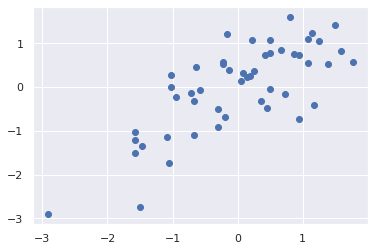

,Poverty
States,
New Hampshire,7.60
Maryland,8.10
Alaska,8.40
New Jersey,8.70
Hawaii,9.10
Connecticut,9.30
Wyoming,9.40
Minnesota,9.60
Utah,9.60


Infant Mort


""


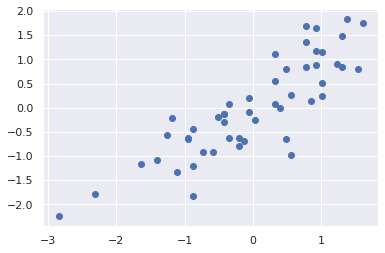

,Infant Mort
States,
Washington,4.70
Massachusetts,4.80
California,5.00
Utah,5.10
Iowa,5.10
Minnesota,5.20
New Jersey,5.50
Oregon,5.50
Vermont,5.50


White


""


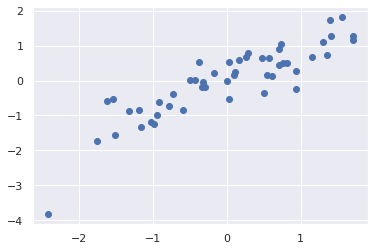

,White
States,
Hawaii,29.70
Mississippi,60.60
Maryland,63.40
Louisiana,64.80
Georgia,65.40
South Carolina,68.70
Alaska,70.60
Alabama,71.00
Virginia,73.00


Crime


""


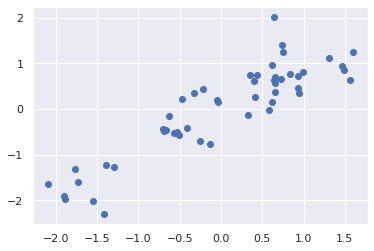

,Crime
States,
Maine,118
Vermont,124
New Hampshire,137
North Dakota,142
South Dakota,169
Rhode Island,227
Utah,235
Idaho,239
Wyoming,239


Doctors


""


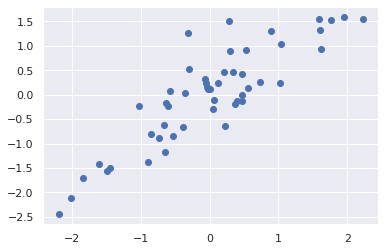

,Doctors
States,
Idaho,168.80
Oklahoma,173.50
Mississippi,177.90
Wyoming,184.40
Nevada,187.80
Iowa,189.30
Arkansas,203.40
Utah,208.10
Arizona,209.70


Traf Deaths


""


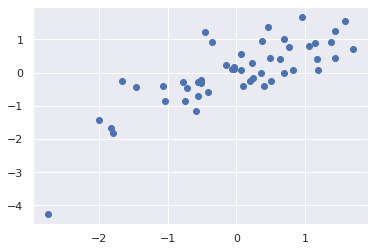

,Traf Deaths
States,
Massachusetts,0.76
Rhode Island,0.80
Vermont,0.86
Connecticut,0.86
Minnesota,0.88
New Jersey,0.95
New Hampshire,0.96
New York,0.97
Washington,1.00


University


""


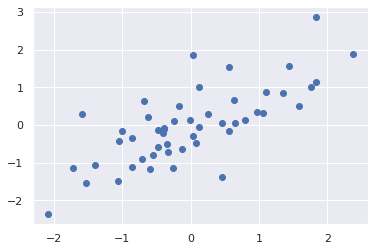

,University
States,
West Virginia,17.10
Arkansas,18.80
Mississippi,19.40
Kentucky,19.70
Louisiana,20.30
Nevada,21.90
Alabama,22.00
Oklahoma,22.20
Tennessee,22.90


Unemployed


""


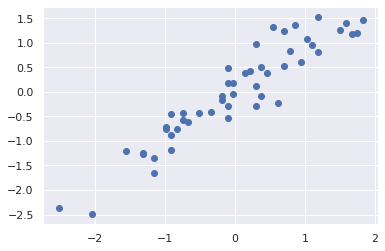

,Unemployed
States,
South Dakota,3.00
Wyoming,3.10
North Dakota,3.20
Nebraska,3.30
Utah,3.40
New Hampshire,3.80
Oklahoma,3.80
Hawaii,3.90
Virginia,4.00


Income


""


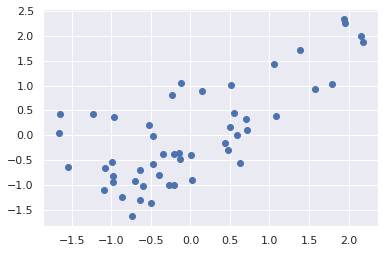

,Income
States,
Mississippi,37790
West Virginia,37989
Arkansas,38815
Kentucky,41538
Alabama,42666
Oklahoma,42822
New Mexico,43508
Tennessee,43614
Montana,43654


Population


""


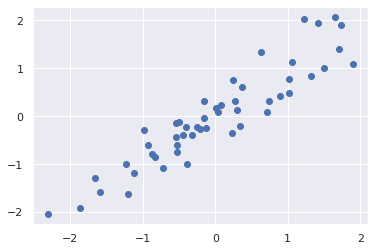

,Population
States,
Wyoming,523226
Vermont,620438
North Dakota,637534
Alaska,679893
South Dakota,795521
Delaware,865314
Montana,957123
Rhode Island,1059706
Hawaii,1269796


In [108]:
import pandas as pd
import matplotlib.pyplot as plt  
from matplotlib import colors

import matplotlib.pyplot as plt
%matplotlib inline


def b_g(s, cmap='PuBu', low=0, high=0, frame=None):
    # Pass the columns from Dataframe A 
    a = frame.loc[:,s.name].copy()
    rng = a.max() - a.min()
    norm = colors.Normalize(a.min() - (rng * low),
                        a.max() + (rng * high))
    normed = norm(a.values)
    c = [colors.rgb2hex(x) for x in plt.cm.get_cmap(cmap)(normed)]
    return ['background-color: %s' % color for color in c] 

#N=50
#area = (30 * np.random.rand(N))**2  # 0 to 15 point radii
for i in t_.columns:
    print(i)
    plt.scatter(S_[i].values, Z_[i].values)
    display(pd.DataFrame())
    plt.show()

    df = pd.DataFrame(B_[i][B_[i].argsort()]).style.apply(b_g,cmap='RdYlGn',frame=pd.DataFrame(Z_[i][Z_[i].argsort()])).set_precision(2)
    #html = df.render()

    #imgkit.from_string(html, str(i) + 'styled_table.png')
    display(df)